<a href="https://colab.research.google.com/github/Elisa1999/Introduction-to-statistical-learning/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
import keras 
import numpy as np
import math
import plotly as plt
import plotly.express as px
import pandas as pd
from sympy import * 

6. Consider the simple function R(β) = sin(β) + β/10.
(a) Draw a graph of this function over the range β ∈ [−6, 6].
(b) What is the derivative of this function?
(c) Given β0 = 2.3, run gradient descent to find a local minimum of R(β) using a learning rate of ρ = 0.1. Show each of β0,β1,... in your plot, as well as the final answer.
(d) Repeat with β0 = 1.4.

In [24]:
#a)
dat = [[i, math.sin(i) + i//10] for i in range(-6, 7)]
dat1 = pd.DataFrame(dat,columns = ['x', 'y'])
px.line(dat1, dat1.x, dat1.y)

In [25]:
#b)
x, y = symbols('x y')
gfg_exp = sin(x) + x/10
diff(gfg_exp, x)

cos(x) + 1/10

In [26]:
#c)
beta_0 = 2.3
beta = [] 
learning_rate = 0.1 
for i in range(0,1000):
   beta.append(beta_0 - learning_rate*(math.cos(beta_0) + beta_0//10))
   loss = math.sin(beta[i]) + beta[i]//10
   if round(beta_0,2) == round(beta[i],2):
       break 
   else: 
     beta_0 = beta[i]

In [27]:
dat2 = pd.DataFrame([[i, beta[i]] for i in range(0, len(beta))], columns = ['x', 'y'])
px.line(dat2, dat2.x, dat2.y)

In [28]:
#d)
beta_0 = 1.4
learning_rate = 0.1 
beta = []
for i in range(0,1000):
   beta.append(beta_0 - learning_rate*(math.cos(beta_0) + beta_0//10))
   loss = math.sin(beta[i]) + beta[i]//10
   if round(beta_0,2) == round(beta[i],2):
       break 
   else: 
     beta_0 = beta[i]

dat2 = pd.DataFrame([[i, beta[i]] for i in range(0, len(beta))], columns = ['x', 'y'])
px.line(dat2, dat2.x, dat2.y)

7. Fit a neural network to the Default data. Use a single hidden layer with 10 units, and dropout regularization. Have a look at Labs 10.9.1– 10.9.2 for guidance. Compare the classification performance of your model with that of linear logistic regression.
parametrized

In [29]:
default = pd.read_csv('dataset-63314.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [30]:
X = default.iloc[:, 1:4]
y = default.default

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.student = le.fit_transform(X.student)
y = le.fit_transform(y)
print(X)
print(y)

      student      balance        income
0           0   729.526495  44361.625074
1           1   817.180407  12106.134700
2           0  1073.549164  31767.138947
3           0   529.250605  35704.493935
4           0   785.655883  38463.495879
...       ...          ...           ...
9995        0   711.555020  52992.378914
9996        0   757.962918  19660.721768
9997        0   845.411989  58636.156984
9998        0  1569.009053  36669.112365
9999        1   200.922183  16862.952321

[10000 rows x 3 columns]
[0 0 0 ... 0 0 0]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.54683732  0.37648721 -1.3695187 ]
 [ 1.54683732  0.38831523 -1.53138321]
 [-0.6464804   0.53312957  1.10735603]
 ...
 [ 1.54683732 -0.30403331 -1.45905059]
 [ 1.54683732 -1.63476848 -1.46725274]
 [-0.6464804  -1.02952038  1.40068222]]


In [34]:
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=10, activation='sigmoid', input_shape= X_train[0].shape))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=1 , activation ='sigmoid'))

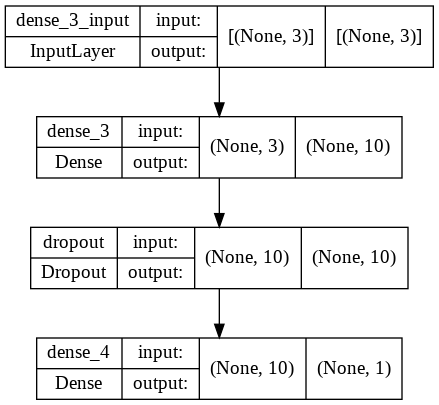

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(ann,
           to_file="model.png",
           show_shapes=True,
           show_layer_names=True,
          )


In [36]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train,  epochs = 10, validation_split = 0.2)

Epoch 1/10
200/200 [==============================] - 2s 5ms/step - loss: 0.7463 - accuracy: 0.5200 - val_loss: 0.4450 - val_accuracy: 0.9737
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8777 - val_loss: 0.2413 - val_accuracy: 0.9737
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.9531 - val_loss: 0.1653 - val_accuracy: 0.9737
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2042 - accuracy: 0.9616 - val_loss: 0.1314 - val_accuracy: 0.9737
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1740 - accuracy: 0.9658 - val_loss: 0.1144 - val_accuracy: 0.9737
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1588 - accuracy: 0.9661 - val_loss: 0.1042 - val_accuracy: 0.9737
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1465 - accuracy: 0.9661 - val_loss: 0.0975 - val_accuracy: 0.9737
Epoch 

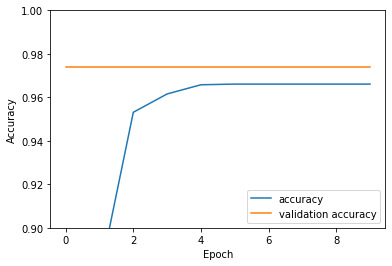

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [38]:
test_loss, test_acc = ann.evaluate(X_test, y_test)
print(test_acc)

63/63 [==============================] - 0s 4ms/step - loss: 0.1123 - accuracy: 0.9630
0.9629999995231628


8. From your collection of personal photographs, pick 10 images of an- imals (such as dogs, cats, birds, farm animals, etc.). If the subject does not occupy a reasonable part of the image, then crop the image. Now use a pretrained image classification CNN as in Lab 10.9.4 to predict the class of each of your images, and report the probabilities for the top five predicted classes for each image.

In [39]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50

In [187]:
!unzip -q /content/test.zip -d /content/test

In [40]:
model = ResNet50(weights='imagenet')
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

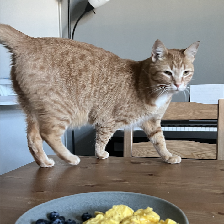

[[('n02127052', 'lynx', 0.37906197), ('n12144580', 'corn', 0.20961118), ('n02124075', 'Egyptian_cat', 0.08810912), ('n03400231', 'frying_pan', 0.051340736), ('n02123159', 'tiger_cat', 0.04346081)]]


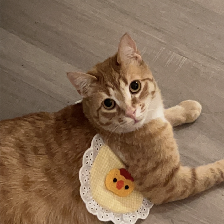

[[('n02124075', 'Egyptian_cat', 0.45194525), ('n02123045', 'tabby', 0.27200645), ('n02123159', 'tiger_cat', 0.19333966), ('n02127052', 'lynx', 0.0266368), ('n04553703', 'washbasin', 0.009446425)]]


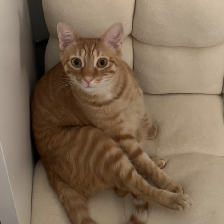

[[('n02123159', 'tiger_cat', 0.2096738), ('n04554684', 'washer', 0.19564131), ('n04553703', 'washbasin', 0.14852497), ('n02808440', 'bathtub', 0.08612253), ('n04493381', 'tub', 0.06956626)]]


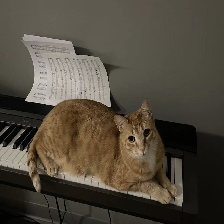

[[('n04515003', 'upright', 0.14307432), ('n04004767', 'printer', 0.14199652), ('n02127052', 'lynx', 0.087353714), ('n02326432', 'hare', 0.056290124), ('n02328150', 'Angora', 0.043420464)]]


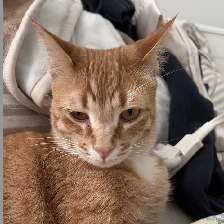

[[('n02127052', 'lynx', 0.28688675), ('n02124075', 'Egyptian_cat', 0.13562146), ('n06785654', 'crossword_puzzle', 0.11625337), ('n04376876', 'syringe', 0.06313495), ('n03482405', 'hamper', 0.04939675)]]


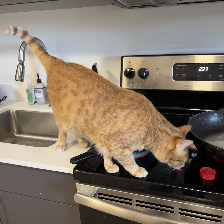

[[('n03207941', 'dishwasher', 0.3107052), ('n02124075', 'Egyptian_cat', 0.1943958), ('n02123045', 'tabby', 0.1494605), ('n02123159', 'tiger_cat', 0.074196614), ('n04041544', 'radio', 0.07121448)]]


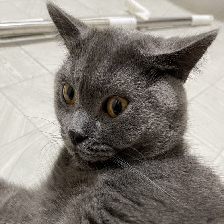

[[('n02124075', 'Egyptian_cat', 0.3612187), ('n02123045', 'tabby', 0.33688396), ('n02123159', 'tiger_cat', 0.08271245), ('n02127052', 'lynx', 0.06352801), ('n02123394', 'Persian_cat', 0.020858884)]]


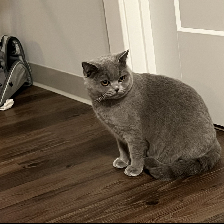

[[('n04493381', 'tub', 0.16627887), ('n02808440', 'bathtub', 0.09204886), ('n03223299', 'doormat', 0.086826324), ('n02124075', 'Egyptian_cat', 0.07205366), ('n02123597', 'Siamese_cat', 0.051454183)]]


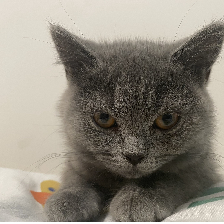

[[('n04493381', 'tub', 0.42107064), ('n02808440', 'bathtub', 0.16630676), ('n02127052', 'lynx', 0.08952671), ('n02119789', 'kit_fox', 0.038151313), ('n04553703', 'washbasin', 0.038076185)]]


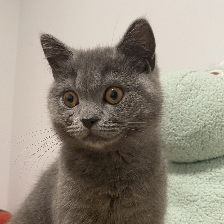

[[('n02124075', 'Egyptian_cat', 0.24574454), ('n02119789', 'kit_fox', 0.18607141), ('n04493381', 'tub', 0.1348017), ('n02127052', 'lynx', 0.12946531), ('n02123597', 'Siamese_cat', 0.0781287)]]


In [41]:
img_path = []

for i in range(1,11):
  img_path.append('/content/test/cat/cat'+ str(i) + '.jpg') 
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
  img = image.load_img(img_path[i-1],color_mode='rgb', target_size=(224, 224))
  display(img)
  # Converts a PIL Image to 3D Numy Array
  x = image.img_to_array(img)
  # Adding the fouth dimension, for number of images
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  print(decode_predictions(features))


13. Repeat the analysis of Lab 10.9.5 on the IMDb data using a similarly structured neural network. There we used a dictionary of size 10,000. Consider the effects of varying the dictionary size. Try the values 1000, 3000, 5000, and 10,000, and compare the results.

In [42]:
 #import data
 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=10000,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3)

In [43]:
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [44]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))


length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


In [45]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [46]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)


x_train  (25000, 10000)
x_test  (25000, 10000)
y_train  (25000,)
y_test  (25000,)


In [52]:
cnn = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
cnn.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape= x_train[0].shape))
cnn.add(tf.keras.layers.Dense(units=16, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1 , activation ='sigmoid'))

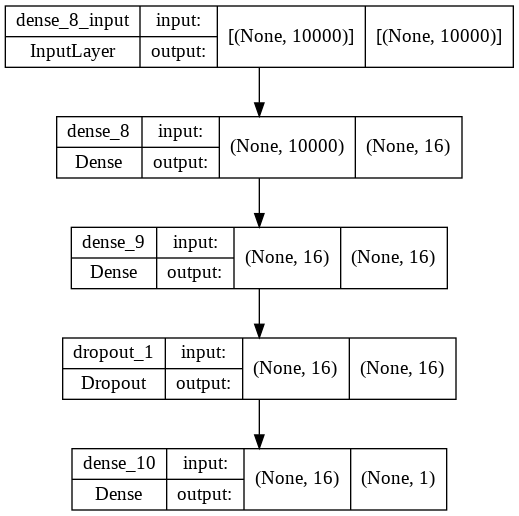

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,
           to_file="model2.png",
           show_shapes=True,
           show_layer_names=True,
          )


In [54]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn.fit(x_train, y_train, batch_size = 16, epochs = 10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.3913 - accuracy: 0.8325 - val_loss: 0.3074 - val_accuracy: 0.8748
Epoch 2/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.2314 - accuracy: 0.9182 - val_loss: 0.2981 - val_accuracy: 0.8880
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1698 - accuracy: 0.9386 - val_loss: 0.3751 - val_accuracy: 0.8768
Epoch 4/10
1250/1250 [==============================] - 9s 8ms/step - loss: 0.1337 - accuracy: 0.9510 - val_loss: 0.4090 - val_accuracy: 0.8774
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0996 - accuracy: 0.9642 - val_loss: 0.5471 - val_accuracy: 0.8734
Epoch 6/10
1250/1250 [==============================] - 9s 8ms/step - loss: 0.0788 - accuracy: 0.9715 - val_loss: 0.5571 - val_accuracy: 0.8744
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0573 - accuracy: 0.9804 - val_loss: 0.7749 - val_accurac

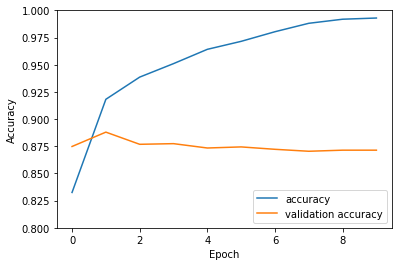

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [56]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print(test_acc)

782/782 [==============================] - 3s 4ms/step - loss: 1.0605 - accuracy: 0.8557
0.8557199835777283
